In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
import pandas as pd

# Load the training dataset
data_path = "data/train.csv"
df = pd.read_csv(data_path)

# Display first few rows
print("🔍 First 5 rows:")
print(df.head())

# Dataset info
print("\n📊 Dataset info:")
print(df.info())

# Statistical summary
print("\n📈 Summary stats:")
print(df.describe())


🔍 First 5 rows:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2

In [3]:
import os
print(os.getcwd())


C:\Users\HP\OneDrive\Desktop\house_price_prediction


In [4]:
print(os.listdir("data"))


['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


In [5]:
# Missing values
print("🧩 Missing values:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Data types
print("\n🧬 Data types:")
print(df.dtypes.value_counts())


🧩 Missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

🧬 Data types:
object     43
int64      35
float64     3
Name: count, dtype: int64


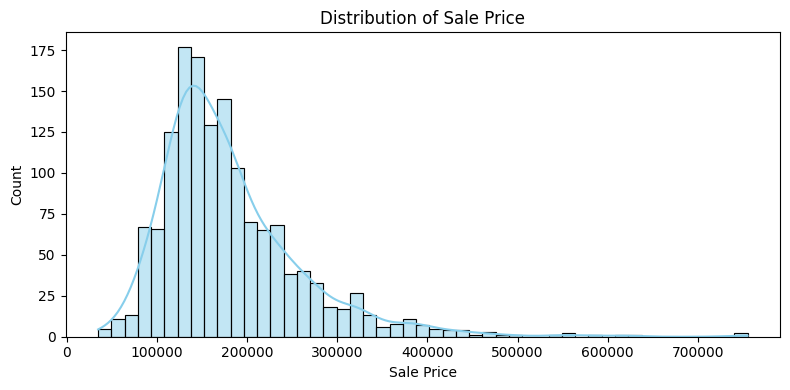

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


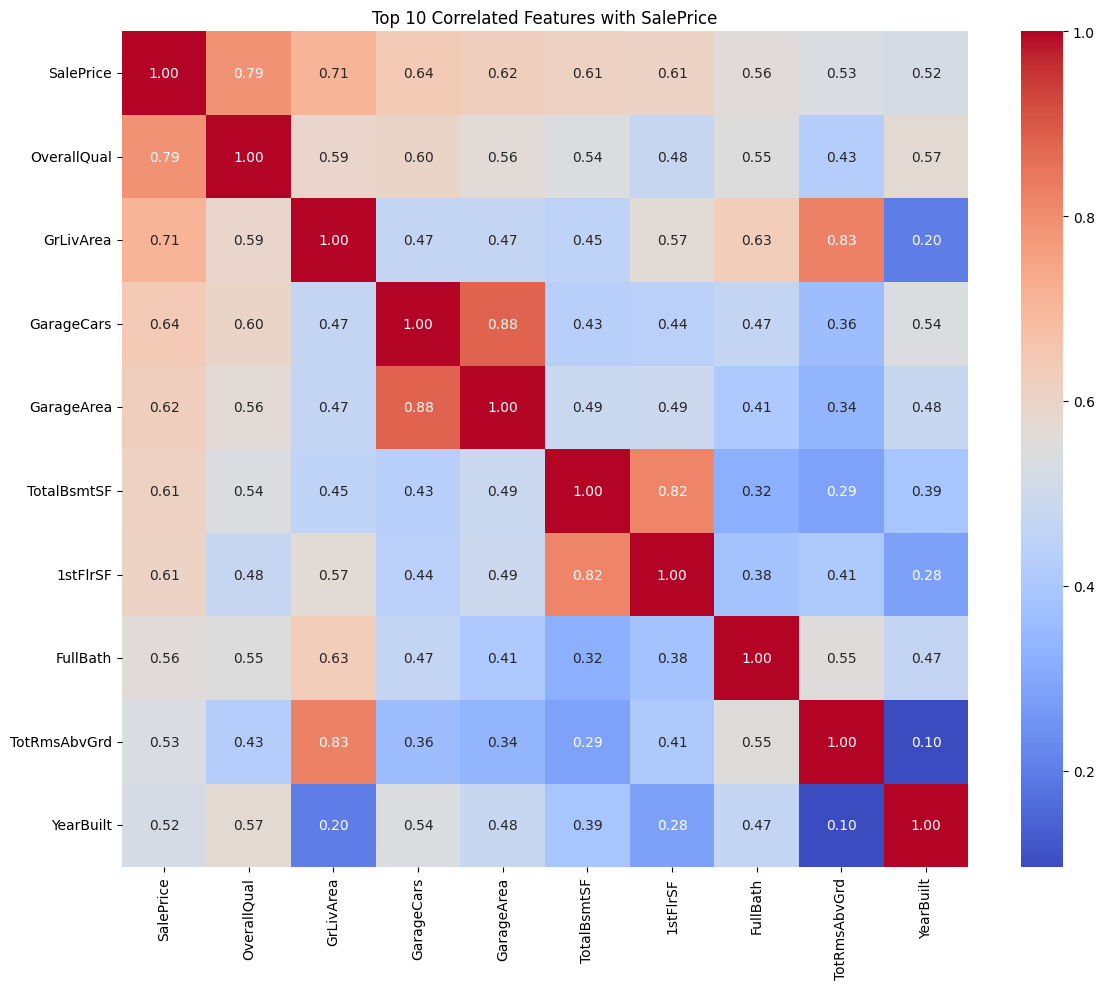

In [7]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10).index

sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 10 Correlated Features with SalePrice")
plt.tight_layout()
plt.show()


In [8]:
# Select features and target
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
target = 'SalePrice'

X = df[features]
y = df[target]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error: {mse:.2f}")
print(f"📈 R² Score: {r2:.2f}")


📉 Mean Squared Error: 1576962754.88
📈 R² Score: 0.79


In [10]:
# Fill missing values in test set with mean of the column
X_test_final = X_test_final.fillna(X_test_final.mean())

# Predict using the trained model
test_preds = model.predict(X_test_final)

# Prepare submission
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_preds
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv saved successfully!")


NameError: name 'X_test_final' is not defined

In [ ]:
pip install lightgbm

In [11]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM dataset format
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Train model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'verbose': -1
}

model = lgb.train(params, train_data, valid_sets=[train_data, val_data], num_boost_round=100, early_stopping_rounds=10)

# Predictions & evaluation
val_preds = model.predict(X_val)
mse = mean_squared_error(y_val, val_preds)
r2 = r2_score(y_val, val_preds)

print(f"📉 MSE: {mse}")
print(f"📈 R² Score: {r2}")


TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [12]:
pip install --upgrade lightgbm


Note: you may need to restart the kernel to use updated packages.


In [13]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'verbose': -1
}

# Train with early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[val_data],
    valid_names=['val'],
    early_stopping_rounds=10
)

# Predict & evaluate
val_preds = model.predict(X_val, num_iteration=model.best_iteration)
mse = mean_squared_error(y_val, val_preds)
r2 = r2_score(y_val, val_preds)

print(f"📉 MSE: {mse}")
print(f"📈 R² Score: {r2}")


TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'